<a href="https://colab.research.google.com/github/michaeljmcardoso/Projeto_Analisando-os-Dados-do-Airbnb_Santiago_Chile/blob/main/Analisando_os_Dados_do_Airbnb_Santiago_Chile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**

Michael J M Cardoso

*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *SANTIAGO*


<center><img alt="Analisando Airbnb" width="65%" src="https://img.freepik.com/vetores-premium/horizonte-da-cidade-de-santiago-do-chile-em-um-fundo-branco-ilustracao-em-vetor-plana-conceito-de-viagens-e-turismo-de-negocios-com-edificios-modernos-imagem-para-banner-ou-site_596401-175.jpg?w=2000"></center>

O [Airbnb](https://www.airbnb.com.br/) já é considerado como a **maior empresa hoteleira da atualidade**. O curioso é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada há 10 anos, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

---

**Neste *notebook*, o objetivo é analisar os dados referentes à cidade Santiago, Región Metropolitana de Santiago, Chile e ver quais insights podem ser extraídos a partir dos dados brutos.** 

<center><img alt="Analisando Airbnb" width="65%" src="https://images.unsplash.com/photo-1557974040-3bec341da09b?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8Nnx8c2FudGlhZ28lMjBjaGlsZXxlbnwwfHwwfHw%3D&auto=format&fit=crop&w=700&q=60" "Regiao Metropolitana del Chile"></center>

Santiago, capital e maior cidade do Chile, fica em um vale circundado pelos Andes cobertos pela neve e a cadeia de montanhas chilena. A Plaza de Armas, o coração do centro velho colonial da cidade, abriga 2 pontos turísticos históricos neoclássicos: o Palacio de la Real Audiencia de 1808, sede do museu de história nacional, e a catedral metropolitana do século 18. La Chascona é a casa do poeta Pablo Neruda que foi transformada em museu (Google).
Da mesma forma que outras capitais pelo mundo, Santiago é um destino com potencial turístico durante todo o ano. A capital chilena tem atraído cada vez mais turistas ao longo dos anos. Vinícolas, estações de ski, shoppings enormes, ótimos restaurantes, bons hotéis e uma cordilheira imponente ao redor da cidade, a [Cordilheira dos Andes](https://pt.wikipedia.org/wiki/Andes).

<center><img alt="Analisando Airbnb" width="50%" src=https://images.unsplash.com/photo-1486312338219-ce68d2c6f44d?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=872&q=80></center>

## Obtenção dos Dados
Todos os dados utilizados neste projeto foram coletados a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial utilizaremos apenas o seguinte arquivo:

* `listings.csv` *Summary information and metrics for listings in Santiago (good visualizations).*

Este dataset poderá sofrer atualização. No momento, a ultima compilação foi realizada em 22 September de 2022 e pode ser acessada no link abaixo:

* [dataset](http://data.insideairbnb.com/chile/rm/santiago/2022-09-22/visualisations/listings.csv)

In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/chile/rm/santiago/2022-09-22/visualisations/listings.csv")

In [ ]:
#listar as colunas do DateFrame
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

## Análise dos Dados

Nesta etapa o objetivo é criar uma visão geral, com vistas a produzir um entendimento de **como os dados estão estruturados**. Mas antes vamos listar as variáveis que encontraremos neste *dataset*, por meio de um **dicionário de variáveis**. Vejamos.

####**Dicionário das variáveis**:

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada 
* `host_id` - número de id do proprietário
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor
* `neighbourhood` - nome do bairro
* `latitude` - coordenada de latitude da propriedade
* `longitude` - coordenada de longitude da propriedade 
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nigths` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de avaliações que a propriedade possui
* `last_review` - data da última avaliação
* `reviews_per_month` - quantidade de avaliações por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `license` - número de registro

#### Overview do dataset
Antes de iniciar qualquer análise, faremos uma breve verificação do *dataset*, **analisando as 5 primeiras entradas**. Com o método `.head()` podemos facilmente ter um *overview* de nosso conjunto de dados.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,33491101,Casita refugio interior,252327165,Luz,NaN,El Bosque,-33.56362,-70.70975,Private room,30000,1,0,NaN,NaN,2,140,0,NaN
1,41380910,Casa Condominio Piscina Chamisero/8min de Vita...,110039387,Stephanie,NaN,Huechuraba,-33.32342,-70.63119,Entire home/apt,70000,30,4,2021-03-14,0.13,1,52,0,NaN
2,49392,Share my Flat in Providencia,224592,Maria,NaN,Providencia,-33.43266,-70.60072,Private room,49590,3,0,NaN,NaN,1,178,0,NaN
3,52811,Suite Providencia 1 Santiago Chile,244792,Cristián,NaN,Providencia,-33.42959,-70.61880,Entire home/apt,50526,1,46,2021-11-04,0.32,3,0,1,NaN
4,53494,depto centro ski el colorado chile,249097,Paulina,NaN,Lo Barnechea,-33.34344,-70.29432,Entire home/apt,149999,2,38,2021-05-22,0.50,1,356,0,NaN


#### Número de entradas, os tipos e as quantidades das variáveis

Observando as primeiras entradas já é possível ter noção dos atributos (variáveis) e entradas que nosso conjunto de dados possui. Mas ainda precisamos **verificar o número de entradas, quais os tipos e as quantidades das variáveis**, antes de partirmos para as análises.

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna. Este `dataset` que baixamos é a versão "resumida" do Airbnb que se encontra na mesma página que baixamos o arquivo `listings.csv`. Lá também encontramos uma versão mais completa (listings.csv.gz) com 8574 entradas e 74 variáveis. **A versão resumida que utilizaremos possui 8574 entradas e 18 variáveis**.


In [ ]:
# identificar o volume de dados do DataFrame

print("-*-" * 14)
print("Entradas: \t {}".format(df.shape[0]))
print("Variáveis: \t {}\n".format(df.shape[1]))
print("-*-" * 14)

# mostrar o tipo das variáveis
display(df.dtypes)

-*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Entradas: 	 8574
Variáveis: 	 18

-*--*--*--*--*--*--*--*--*--*--*--*--*--*-


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

#### Alterando o data type da coluna price para float

Vemos que a coluna price (preço) está definida como `int64`, ou seja números inteiros. contudo, tratando-se de dados referentes a um valor monetário (uma medida), é mais conveniente tratá-los como números decimais (`float`). Sendo assim, vamos mudar o tipo da coluna `price` para `float`.

In [ ]:
# alterar data type da coluna price para float
df.price = df.price.astype(float)
print(df["price"].dtypes)

float64


#### Porcentagem de valores ausentes no **dataset**

Para melhor visualizarmos os dados ausentes, iremos ordenar os valores percentuais em ordem decrescente, utilizando a função `df.sort_values (ascending=False)`.

In [ ]:
# ordenar em sentido decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.979123
reviews_per_month                 0.273035
last_review                       0.273035
name                              0.000350
host_name                         0.000117
number_of_reviews                 0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
id                                0.000000
minimum_nights                    0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

Agora que identificamos o volume do Dataframe, vamos verificar a porcentagem dos *missing values* (valores ausentes) no *dataset*. Antes de irmos para o  código é salutar entender alguns motivos típicos de falta de dados: o usuário pode ter esquecido de preencher o campo, ter digitado equivocadamente, ou não quis preencher um campo devido suas crenças, por exemplo, e até mesmo um erro de programção durante a transferência dos dados.

É necessário, portanto, entendermos esses dados ausentes do ponto de vista estatístico, pois a qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. Assim, buscaremos entender logo de início se esses valores nulos são significativos quando comparados ao total de entradas e com nossos objetivos.

Observações:

* É possível ver que as colunas `neighbourhood_group` e `license` possuem praticamente 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em 27% das linhas.
* As variáveis `name` e `host_name` têm aproximadamente menos de 1% dos valores nulos.

Assim, notamos que as colunas em destaque com valores faltantes serão irrelevantes para nossa análise inicial. Pois a coluna `neighbourhood_group`, referindo-se a um tipo de zoneamento de bairros ou distrito e estando totalmente vazia, não se mostrou relevante uma vez que, a coluna seguinte, `neighbourhood`(bairro), que está quase totalmente preenchida, poderia ser utilizada caso desejássemos trabalhar com esse atributo em nossas análises.

Do mesmo modo, as colunas `reviews_per_month`, `last_review` (avaliações por mês e última avaliação) e `license`, também não se mostraram relevantes para nosso objetivo.

Nas colunas `name` e `host_name`(nome e sobrenome) foram encontradas poucas entradas vazias. Neste caso, optaremos por excluir apenas tais entradas, não a coluna inteira.

#####Exclusão de linhas com entradas faltantes e colunas com dados ausentes

In [ ]:
# Excluindo linhas com entradas faltantes
df.dropna(axis=0, inplace=True)

In [ ]:
# Excluindo colunas com dados ausentes
df.drop(columns=['neighbourhood_group', 'license', 'reviews_per_month', 'last_review'], inplace=True) 

In [ ]:
# Confirmando a exclusão das entradas ausentes
(df.isnull().sum()).sort_values(ascending=False)

id                                0.0
name                              0.0
host_id                           0.0
host_name                         0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
number_of_reviews_ltm             0.0
dtype: float64

Agora, após o tratamento das entradas faltantes, é interessante questionarmos qual o tipo de distribuição das variáveis. Para identificar e melhor visualizar a distribuição das variáveis, iremos plotar um histograma.

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,33491101,Casita refugio interior,252327165,Luz,El Bosque,-33.56362,-70.70975,Private room,30000.0,1,0,2,140,0
1,41380910,Casa Condominio Piscina Chamisero/8min de Vita...,110039387,Stephanie,Huechuraba,-33.32342,-70.63119,Entire home/apt,70000.0,30,4,1,52,0
2,49392,Share my Flat in Providencia,224592,Maria,Providencia,-33.43266,-70.60072,Private room,49590.0,3,0,1,178,0
3,52811,Suite Providencia 1 Santiago Chile,244792,Cristián,Providencia,-33.42959,-70.61880,Entire home/apt,50526.0,1,46,3,0,1
4,53494,depto centro ski el colorado chile,249097,Paulina,Lo Barnechea,-33.34344,-70.29432,Entire home/apt,149999.0,2,38,1,356,0


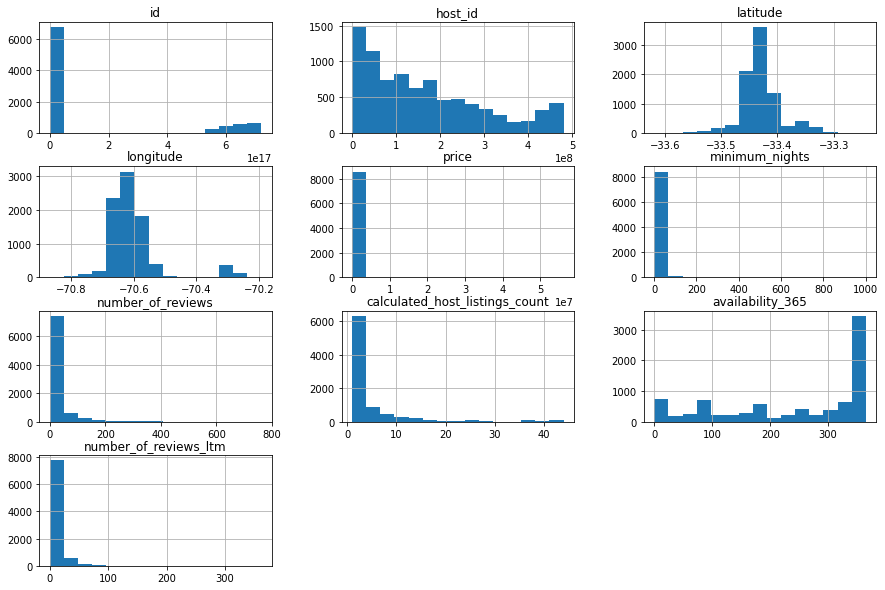

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15 , figsize=(15, 10));

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [ ]:
# ver o resumo estatístico das variáveis númericas pricr e minimun_nigths
df[['price', 'minimum_nights']].describe()

,price,minimum_nights
count,8.574000e+03,8574.000000
mean,9.131425e+04,7.516562
std,8.236683e+05,30.444736
min,6.830000e+03,1.000000
25%,2.800000e+04,1.000000
50%,4.200000e+04,2.000000
75%,6.540875e+04,3.000000
max,5.613975e+07,1000.000000


### **Agora, partindo de nosso conjunto de dados, que tal fazermos algumas análises?**

####**Qual a média dos preços de aluguel?**

Se você já viajou ou está pensando em viajar para outra cidade, certamente  vai querer saber qual o valor da hospedagem nesse local, para saber quanto você vai gastar. Em nosso caso hipotétio, tendo em mãos os dados do Airbnb, queremos descobrir qual o preço médio dos aluguéis na cidade de Santiago do Chile.

Para sabermos a média dos preços do alguel devemos acessar a coluna `price` de nosso *dataset*, obter todos os valores e deles extrair uma média.

Assim descobrimos que o preço médio do aluguel na cidade de Santiago del Chile foi de 91314.25. Contudo, a variável price teve 75% do valor abaixo de 6540.87.

In [ ]:
# imprimir a média dos preços do aluguel
print("{:.0f}".format(df.price.mean()))

91314


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 6540.87 porém seu valor máximo é 561397.49.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.


####Boxplot para minimum_nigths

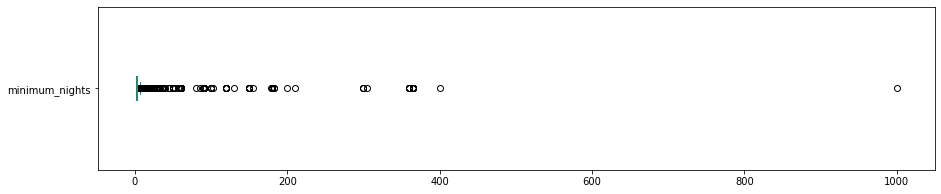

minimum_nights: valores acima de 30:
230 entradas
2.6825%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

####Boxplot para price

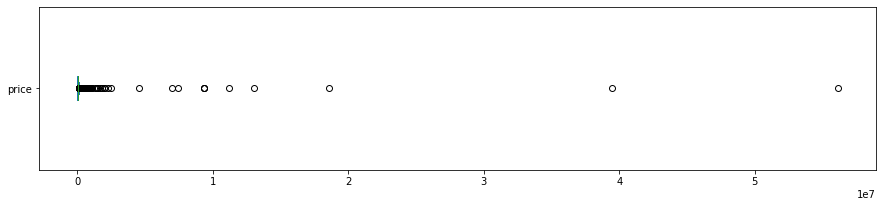


price: valores acima de 28000
6412 entradas
74.7842%


In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 28000 para price
print("\nprice: valores acima de 28000")
print("{} entradas".format(len(df[df.price > 28000])))
print("{:.4f}%".format((len(df[df.price > 28000]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

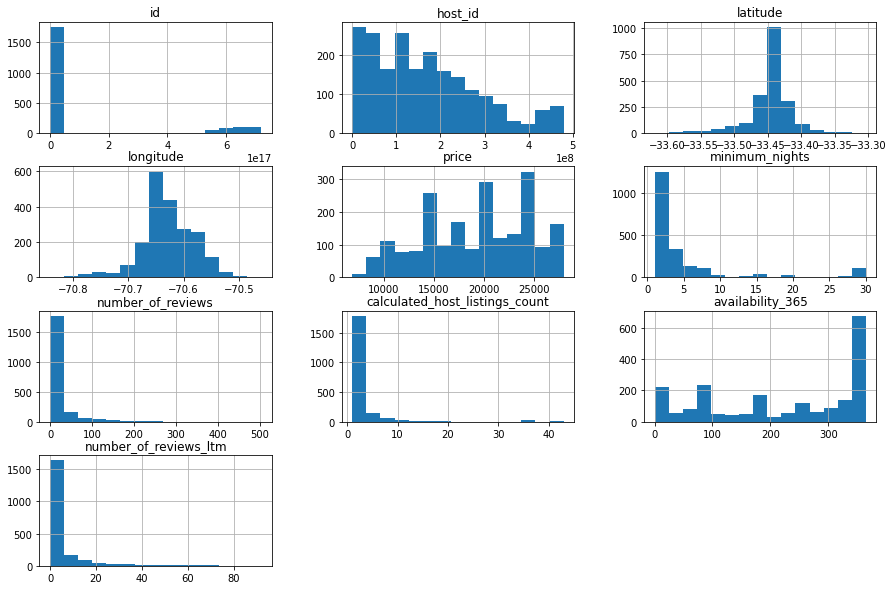

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 28000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

#### **Qual a correlação existente entre as variáveis?**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vamos:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
price,1.000000,-0.026271,0.090397,0.025939,0.013879
minimum_nights,-0.026271,1.000000,-0.014086,-0.015891,-0.043947
number_of_reviews,0.090397,-0.014086,1.000000,0.043596,-0.076979
calculated_host_listings_count,0.025939,-0.015891,0.043596,1.000000,0.118052
availability_365,0.013879,-0.043947,-0.076979,0.118052,1.000000


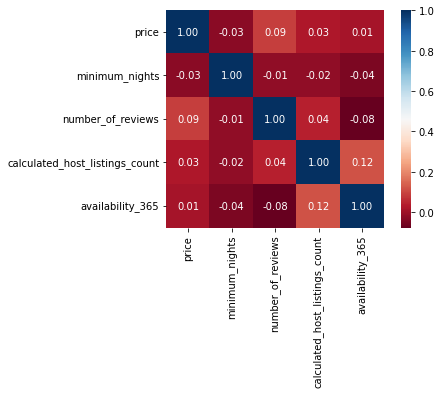

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

# mostrar a matriz de correlação
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True); 

#### **Qual o tipo de imóvel mais alugado no Airbnb?**
O tipo de imóvel mais alugado no Airbnb foi o Entire home/apt (Casa/apto), com 5518 locações, que corresponde a quase 64% das locações no período. E o segundo, Private room (quarto privativo), com 2855 (33%) dos aluguéis.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    5518
Private room       2855
Shared room         139
Hotel room           62
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts() / df.shape[0]

Entire home/apt    0.643574
Private room       0.332983
Shared room        0.016212
Hotel room         0.007231
Name: room_type, dtype: float64

#### **Qual a localidade mais cara do dataset?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação. Vemos que a localidade mais cara foi Lo Barnechea e, em segundo, Santiago.


In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Lo Barnechea        20539.933333
Santiago            20423.874317
Vitacura            20383.000000
Las Condes          20376.562189
Estación Central    20237.113208
Providencia         19567.000000
Lo Prado            19500.000000
Independencia       19487.233333
Recoleta            19417.109091
Pudahuel            19387.562500
Name: price, dtype: float64

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

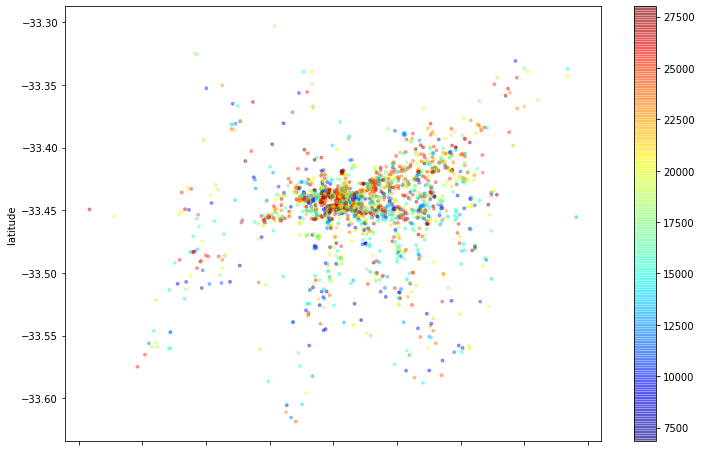

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

#### **Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights`
df.minimum_nights.mean()

7.516561698157219

Em média, o mínimo de noites para aluguel foi de 7.

## Conclusões

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis, o que pode distorcer as informações estatísticas de alguns atributos. Como por exemplo a média do valor dos aluguéis.
Pudemos identificar as localidades com valor mais caro e média mínima de noites e tipo de imóvel mais alugado pelo Airbnb.
Por fim, lembramos que este *dataset* é uma versão resumida, útil para realizarmos uma abordagem inicial. Assim, recomendamos que seja usado, em uma próxima análise exploratória mais profunda, o conjunto de dados completos, com um número maior de atributos disponíveis.

https://drive.google.com/file/d/1Es8Pzq-TVOegM9IBpzPmOgHaXYCsvgGO/view?usp=sharing